In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
print(train.shape, test.shape)

train.head(5)

(1460, 81) (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#drop the Id column as it's not useful for training
train.drop("Id", axis = 1, inplace = True)
test_id = test["Id"]
test.drop("Id", axis = 1, inplace = True)

## Handle Outliers

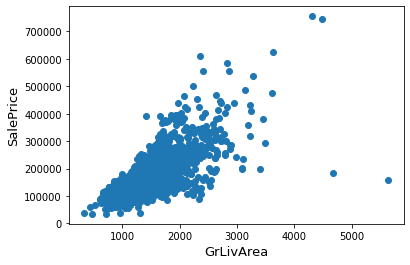

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

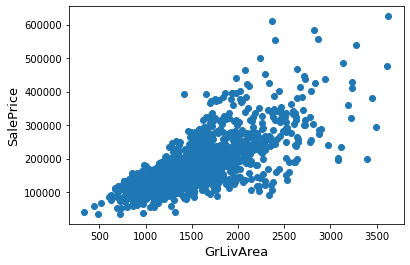

In [8]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000)].index) 
train = train.drop(train[(train['SalePrice']>700000)].index) 

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Normalise target variable

We can see that the target variable is right skewed. As (linear) models work best with normally distributed data, we need to transform this variable and make it more normally distributed. We do this by using the log1p function which  applies log(1+x) to all elements of the column.

mu = 180151.23 and sigma = 76670.25


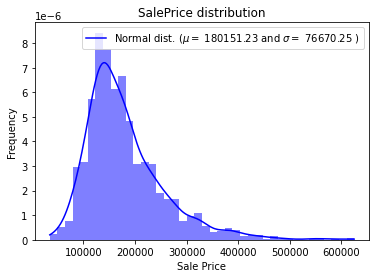

In [9]:
from scipy.stats import norm, skew #for some statistics

sns.histplot(train['SalePrice'], color="blue", kde=True, stat="density", linewidth=0)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( 'mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.xlabel('Sale Price')
plt.title('SalePrice distribution')
plt.show()

mu = 12.02 and sigma = 0.40


Text(0.5, 1.0, 'SalePrice distribution')

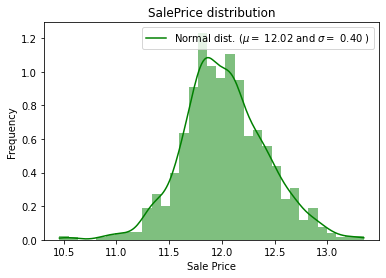

In [10]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.histplot(train['SalePrice'], color="green", kde=True, stat="density", linewidth=0)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.xlabel('Sale Price')
plt.title('SalePrice distribution')

## Check for Missing Values

In [11]:
y_train = train["SalePrice"]
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 79)


In [12]:
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na[all_data_na>0]
all_data_na.sort_values(ascending=False)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [13]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.819240
GrLivArea        0.718844
GarageCars       0.680408
GarageArea       0.655212
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363286
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
MoSold           0.062231
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
YrSold          -0.034319
OverallCond     -0.036843
LowQualFinSF    -0.037698
MSSubClass      -0.075083
KitchenAbvGr    -0.147891
EnclosedPorch   

## Handle the Missing Values

* **PoolQC** : Assume those houses with NA does not have a Pool
* **MiscFeature** : Assume those houses with NA does not have misc features
* **Alley** : Assume those houses with NA does not have "alley access"
* **Fence** : Assume those houses with NA does not have "fence"
* **FireplaceQu** : Assume those houses with NA does not have a fire place
* **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood
* **GarageType GarageFinish GarageQual GarageCond** : Assume those houses with NA do not have a garage
* **GarageYrBlt GarageArea GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage)
* **BsmtFinSF1 BsmtFinSF2 BsmtUnfSF TotalBsmtSF BsmtFullBath BsmtHalfBath** : Missing values are likely zero for having no basement
* **BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement
* **MasVnrArea MasVnrType** : NA most likely means no masonry veneer for these houses. Fill 0 for the area and None for the type
* **MSZoning** : Fill in missing values with the most common values
* **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Not much varience, can safely remove it
* **Functional** : data description says NA means typical
* **Electrical** : Only one NA value. Assign mode to the missing value
* **KitchenQual**: Only one NA value. Assign mode to the missing value
* **Exterior1st Exterior2nd** : Only one NA value. Assign mode to the missing value
* **SaleType** : Assign mode to the missing value
* **MSSubClass** : Na most likely means No building class. Replace missing values with None

In [14]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [15]:
# Should show nothing since all the NA values are handled
all_data_na = all_data.isnull().sum()
all_data_na = all_data_na[all_data_na>0]
all_data_na.sort_values(ascending=False)

Series([], dtype: int64)

In [16]:
#Creating one new attribute

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Transforming some numerical variables that are really categorical

In [17]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [18]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

Check for skews in features, and transformed skewed features (>0.75) using Box-Cox Transformation. We use the scipy function boxcox1p which computes the Box-Cox transformation of 1+x

In [19]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features: ")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

Skew in numerical features: 


,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
LandSlope,4.971350
KitchenAbvGr,4.298845
BsmtFinSF2,4.142863
EnclosedPorch,4.000796
ScreenPorch,3.943508


In [20]:
skewness = skewness[abs(skewness) > 0.75]

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [21]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 220)


In [22]:
x_train = all_data[:len(train)]
x_test = all_data[len(train):]

## Modelling using LazyRegressor

In [23]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

/Users/christopher_sia/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
sample_train_x, sample_test_x, sample_train_y, sample_test_y = train_test_split(x_train, 
                                                                                y_train,
                                                                                test_size=0.20, 
                                                                                random_state=21)

In [25]:
reg = LazyRegressor(verbose=0,
                    ignore_warnings=True, 
                    custom_metric=None,
                    random_state=12)

models, predictions = reg.fit(sample_train_x, sample_test_x, sample_train_y, sample_test_y)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:14<00:00,  2.94it/s]


In [26]:
#show top 20 best performing models only
models.head(20)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoCV,0.68,0.92,0.11,0.30
ElasticNetCV,0.68,0.92,0.11,0.33
LassoLarsCV,0.68,0.92,0.11,0.28
GradientBoostingRegressor,0.68,0.92,0.11,0.61
PoissonRegressor,0.67,0.92,0.12,0.02
BayesianRidge,0.67,0.92,0.12,0.05
OrthogonalMatchingPursuit,0.67,0.92,0.12,0.02
OrthogonalMatchingPursuitCV,0.67,0.92,0.12,0.04
LGBMRegressor,0.66,0.92,0.12,0.16


## Cross Validation

In [27]:
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [28]:
def cross_validation(pModel, x_train, y_train, pSplits=5):
    
    kfold = KFold(n_splits=pSplits, shuffle=True, random_state=21)

    rmse = np.sqrt(-cross_val_score(pModel, x_train, y_train, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

In [29]:
score = cross_validation(LassoCV(random_state=21), x_train, y_train)

print("LassoCV score: Mean: {:.4f}, STD: {:.4f}".format(score.mean(), score.std()))

LassoCV score: Mean: 0.1143, STD: 0.0064


In [30]:
score = cross_validation(ElasticNetCV(random_state=21), x_train, y_train)

print("ElasticNetCV score: Mean: {:.4f}, STD: {:.4f}".format(score.mean(), score.std()))

ElasticNetCV score: Mean: 0.1145, STD: 0.0063


In [31]:
score = cross_validation(GradientBoostingRegressor(random_state=21), x_train, y_train)

print("GradientBoostingRegressor score: Mean: {:.4f}, STD: {:.4f}".format(score.mean(), score.std()))

GradientBoostingRegressor score: Mean: 0.1240, STD: 0.0091


## Model Training

In [32]:
model_lassoCV = LassoCV(random_state=21)
model_lassoCV.fit(x_train, y_train)

predict_lassoCV = model_lassoCV.predict(x_test)
predict_lassoCV

array([11.71157577, 11.96694352, 12.11922906, ..., 12.0743866 ,
       11.64508475, 12.34450771])

In [33]:
model_ElasticNetCV = ElasticNetCV(random_state=21)
model_ElasticNetCV.fit(x_train, y_train)

predict_ElasticNetCV = model_ElasticNetCV.predict(x_test)
predict_ElasticNetCV

array([11.70283021, 11.96604543, 12.12094629, ..., 12.07519394,
       11.64523051, 12.3448677 ])

In [34]:
model_GradientBoostingRegressor = GradientBoostingRegressor(random_state=21)
model_GradientBoostingRegressor.fit(x_train, y_train)

predict_GBR = model_GradientBoostingRegressor.predict(x_test)
predict_GBR

array([11.69289815, 11.98244897, 12.13711919, ..., 11.95859148,
       11.7164853 , 12.30051515])

In [40]:
predict_test = 0.4*predict_lassoCV + 0.4*predict_ElasticNetCV + 0.2*predict_GBR
predict_test = np.expm1(predict_test)
predict_test

array([121095.37844894, 157893.97466574, 184146.80081587, ...,
       171363.90567663, 115776.22676532, 227714.69892348])

In [41]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = predict_test
sub.to_csv('submission.csv',index=False)